In [1]:
# Code added from CS 231. It was edited and updated by Mohamed Daw for Neural Networks 
# source originally: http://cs231n.github.io/neural-networks-case-study/
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

In [2]:
N = 400 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.loadtxt('face.txt', usecols = (0,1))
Y = np.loadtxt('face.txt', usecols = (2), dtype='uint8')
q = np.array([1,1])
num_examples = X.shape[0]
Y = np.subtract(Y, 1)

alpha = 1e-0

(-1, 1)

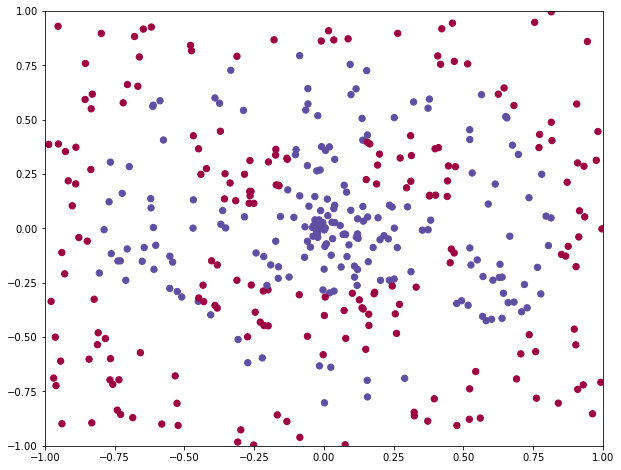

In [3]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

In [7]:
number_hidden_layers = int(input('Enter number of hidden layers : '))
number_of_neurons_per_layer = []
for i in range(number_hidden_layers):
    number_of_neurons_per_layer.append(int(input(('Enter the number of neurons in hidden layer # %d: ' % (i+1)))))


Enter number of hidden layers : 2
Enter the number of neurons in hidden layer # 1: 25
Enter the number of neurons in hidden layer # 2: 25


In [8]:

Weights = [] # Array of Weights
Bias = [] #Array of Biases
hidden_layers = [] # Array of hidden_layers


First_weights = 0.1 * np.random.randn(D, number_of_neurons_per_layer[0])
Weights.append(First_weights)
Bias.append(np.zeros((1, number_of_neurons_per_layer[0])))

temp_hidden_layer = np.zeros((N, number_of_neurons_per_layer[0]))
hidden_layers.append(temp_hidden_layer)

for i in range (number_hidden_layers - 1):
    temp = 0.1 * np.random.randn(number_of_neurons_per_layer[i], number_of_neurons_per_layer[i+1])
    Weights.append(temp)
    temp_hidden_layer = np.zeros((N, number_of_neurons_per_layer[i+1]))
    Bias.append(np.zeros((1, number_of_neurons_per_layer[i+1])))
    hidden_layers.append(temp_hidden_layer)
    
Last_weights = 0.1 * np.random.randn( number_of_neurons_per_layer[-1], K)

Weights.append(Last_weights)
Bias.append(np.zeros((1, K)))





In [ ]:
Weights = [] # Array of Weights
Bias = [] #Array of Biases
hidden_layers = [] # Array of hidden_layers


First_weights = 0.1 * np.random.randn(D, number_of_neurons_per_layer[0])

Weights.append(First_weights)
Bias.append(np.zeros((1, number_of_neurons_per_layer[0])))

temp_hidden_layer = np.zeros((N, number_of_neurons_per_layer[0]))
hidden_layers.append(temp_hidden_layer)

for i in range (number_hidden_layers - 1):
    temp = 0.1 * np.random.randn(number_of_neurons_per_layer[i], number_of_neurons_per_layer[i+1])
    Weights.append(temp)
    temp_hidden_layer = np.zeros((N, number_of_neurons_per_layer[i+1]))
    hidden_layers.append(temp_hidden_layer)
    Bias.append(np.zeros((1, number_of_neurons_per_layer[i+1])))

Last_weights = 0.1 * np.random.randn( number_of_neurons_per_layer[-1], K)

Weights.append(Last_weights)
Bias.append(np.zeros((1, K)))

In [17]:
reg = 1e-8
reg_loss = 0
alpha = 1e-1
Number_of_epochs = 19000

epoch_array = []
loss_array = []

dWeights = []
dhidden_layers = []
dBias = []

for i in range (len(Weights)):
    dWeights.append( 0.01 * np.random.randn(Weights[i].shape[0], Weights[i].shape[1]))
for i in range (len(hidden_layers)):
    dhidden_layers.append( 0.01 * np.random.randn(hidden_layers[i].shape[0], hidden_layers[i].shape[1]))

for i in range (len(Bias)):
    dBias.append( 0.01 * np.random.randn(Bias[i].shape[0], Bias[i].shape[1]))

for i in range(Number_of_epochs):
    hidden_layers[0] = np.maximum(0, np.dot(X, Weights[0]) + Bias[0])
    
    for j in range (number_hidden_layers - 1):
        hidden_layers[j+1] = np.maximum(0,np.dot(hidden_layers[j], Weights[j+1]) + Bias[j+1])
    
    scores = np.dot(hidden_layers[-1], Weights[-1]) + Bias[-1]
    exp_scores = np.exp(scores)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True )
    correct_logprob = -np.log(probs[range(N), Y])
    data_loss = np.sum(correct_logprob) / N

    for z in range(len(Weights)):
        reg_loss += 0.5 * reg * np.sum(Weights[z] * Weights[z])
    
    loss = data_loss + reg_loss
    dscores = probs
    dscores[range(N), Y] -= 1
    dscores /= N   
    if i % 1000 == 0:
        print ("iteration %d: loss %f" % (i, loss))
        epoch_array.append(i)
        loss_array.append(loss)

    
    dhidden_layers[-1] = np.dot(dscores, Weights[-1].T)
    dhidden_layers[-1][hidden_layers[-1] <= 0] = 0
    
   
    
    
    dWeights[-1] = np.dot(hidden_layers[-1].T, dscores)

    dBias[-1] = np.sum(dscores, axis = 0, keepdims = True)
    
    
    for j in range(number_hidden_layers - 1):
        
        dhidden_layers[-2-j] = np.dot(dhidden_layers[-1-j], Weights[-2-j].T)
        dhidden_layers[-2-j][hidden_layers[-2 - j] <= 0] = 0
        dWeights[-2-j] = np.dot(hidden_layers[-2-j].T, dhidden_layers[-1-j])
        dBias[-2-j] = np.sum(dhidden_layers[-2-j], axis = 0, keepdims = True)
       
    dLoss_dW = np.dot(X.T, dhidden_layers_)
    dLoss_dB = np.sum(dhidden_layers_, axis = 0, keepdims = True)
    
    dWeights[0] = np.dot(X.T, dhidden_layers[0])
    dBias[0] = np.sum(dhidden_layers[0], axis = 0, keepdims = True)

    for x in range(len(Weights)):
        Weights[x] += -alpha * dWeights[x]
        Bias[x] += -alpha * dBias[x]
    

25
25
0
1
iteration 0: loss 0.691587
iteration 1000: loss 0.522550
iteration 2000: loss 0.520016
iteration 3000: loss 0.517755
iteration 4000: loss 0.510963
iteration 5000: loss 0.486525
iteration 6000: loss 0.443345
iteration 7000: loss 0.408979
iteration 8000: loss 0.392837
iteration 9000: loss 0.327748
iteration 10000: loss 0.250373
iteration 11000: loss 0.188003
iteration 12000: loss 0.343732
iteration 13000: loss 0.090471
iteration 14000: loss 0.078574
iteration 15000: loss 0.076456
iteration 16000: loss 0.058703
iteration 17000: loss 0.053350
iteration 18000: loss 0.049314


In [18]:
hidden_layers[0] = np.maximum(0, np.dot(X, Weights[0]) + Bias[0])
for j in range (number_hidden_layers - 1):
        hidden_layers[j+1] = np.maximum(0,np.dot(hidden_layers[j], Weights[j+1]) + Bias[j+1])
scores = np.dot(hidden_layers[-1], Weights[-1]) + Bias[-1]
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == Y)))

training accuracy: 1.00


In [19]:
col =[]
print (1e-0)
for i in range(Y.shape[0]):
    if Y[i] == 0:
        col.append('r')
    else:
        col.append('g')
print (len(col))

1.0
400


(200, 200)


(-1.996486, 1.9835140000000036)

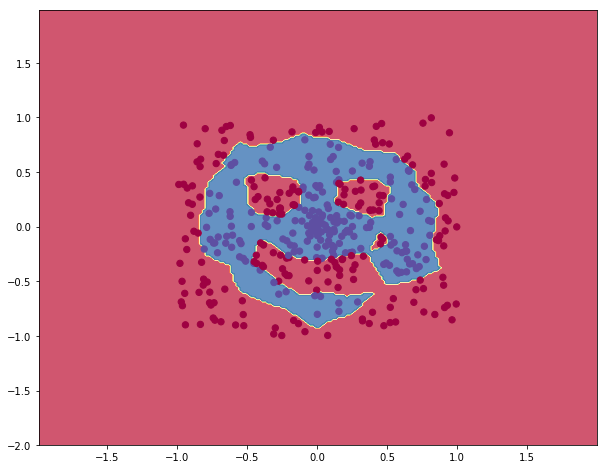

In [20]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], Weights[0]) + Bias[0]), Weights[1]) + Bias[1]
if number_hidden_layers ==2 :
    Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], Weights[0]) + Bias[0]), Weights[1]) + Bias[1]), Weights[2]) + Bias[2]
if number_hidden_layers == 1:
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], Weights[0]) + Bias[0]), Weights[1]) + Bias[1]
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

print (Z.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 40, cmap = plt.cm.Spectral)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())



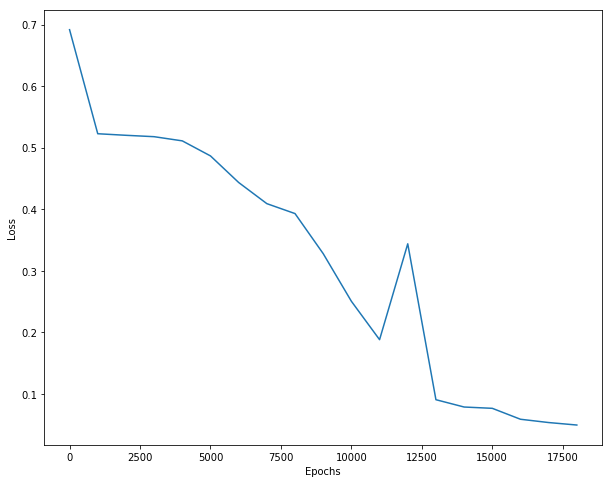

In [21]:
plt.plot(epoch_array, loss_array)
plt.xlabel('Epochs')
plt.ylabel('Loss')
# show the plot on the screen
plt.show()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [22]:
#add MCCR 
#Minimum Correct Classification Rate for each class
# Only for face problem
incorrect_class = np.array([0,0])
for i in range (Y.shape[0]):
    if (predicted_class[i] != Y[i]):
        incorrect_class[Y[i]] += 1
MCCR = (incorrect_class / N) * 100

print (MCCR)  

[ 0.    0.25]
